In [1]:
import tensorflow as tf
import datetime, os
import numpy as np
import matplotlib.pyplot as plt

# Set seed for experiment reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
def padding(i):
    return 2*i*" "

def printVector(p, t):
    out = []
    for x in t:
        out.append("%2.8f" % x)
    return padding(p) + "[" + ",".join(out) + "]"

def printMatrix2D(p, t):
    out = ""
    i=0
    for x in t:
        out += printVector(p+1, x)
        if (i!=len(t)-1):
            out += ","    
        out += "\n"      
        i+=1
    return  padding(p) + "[\n" + out +  padding(p) + "]"

def printMatrix3D(p, t):
    out = ""
    i=0
    for x in t:
        out += printMatrix2D(p+1, x)
        if (i!=len(t)-1):
            out += ","    
        out += "\n"      
        i+=1
    return  padding(p) + "[\n" + out +  padding(p) + "]"

def printMatrix4D(p, t):
    out = ""
    i=0
    for x in t:
        out += printMatrix3D(p+1, x)
        if (i!=len(t)-1):
            out += ","    
        out += "\n"      
        i+=1
    return  padding(p) + "[\n" + out +  padding(p) + "]"

def PrintConvKernel(i, kernel, bias):
    print("//------------------------ layer %i Conv2D" %i)
    print(("var weights%i = " % i) + printMatrix4D(0,tf.transpose(kernel, perm=[3,2,0,1], conjugate=False, name='transpose')))
    print(("var bias%i = "   % i) + printVector(0,bias.numpy()))

def PrintFullWeights(i, weights, bias):
    #print(weights.get_shape())
    #print(bias.get_shape())
    print("//------------------------ layer %i Fullconnected" %i)
    print(("var weights%i = [[TransposeMat(" % i) + printMatrix2D(0,tf.transpose(weights, perm=[1,0], conjugate=False, name='transpose')) + ")]]")
    print(("var bias%i = "   % i) + printVector(0,bias.numpy()))    

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
c,d = np.split(x_train, [1])
input = tf.image.resize(c, [14,14])
output = y_train[0]

5


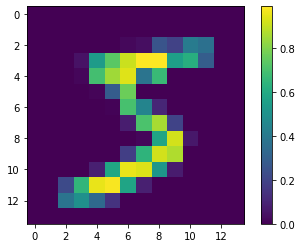

In [4]:
print(output)
plt.imshow(input[0, :, :, 0])
plt.colorbar()

In [5]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(2, [3, 3], activation="relu", padding = "same", input_shape=(14,14,1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(2, [3, 3], activation="relu", padding = "same"))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1, activation=None))
    return model

seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

loss_fn = tf.keras.losses.MeanSquaredError()
#loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

model = create_classical_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 2)         20        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 2)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 2)           38        
_________________________________________________________________
flatten (Flatten)            (None, 98)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 99        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [6]:
def PrintIntermediates(x, weights):
    print("var input = " + printMatrix4D(0,tf.transpose(x, perm=[0,3,1,2], conjugate=False, name='transpose')))
    print()
    PrintConvKernel(0, weights[0], weights[1])
    PrintConvKernel(1, weights[2], weights[3])
    print()
    PrintFullWeights(2, weights[4], weights[5])
    print()
        
PrintIntermediates(input, model.weights)   
#print()
#print("//-------------------------")
#print("var output = " + printMatrix4D(0,tf.transpose(y, perm=[3,0,1,2], conjugate=False, name='transpose')))
y = model.predict(input)
print("Forward output = %s" % y)


var input = [
  [
    [
      [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000],
      [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000],
      [0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.02058824,0.03529412,0.25686276,0.19705883,0.41274512,0.36666667,0.00000000,0.00000000],
      [0.00000000,0.00000000,0.00000000,0.04803922,0.54607844,0.73921573,0.91078430,0.99215686,0.99019611,0.56078434,0.62058824,0.29215688,0.00000000,0.00000000],
      [0.00000000,0.00000000,0.00000000,0.01764706,0.69411767,0.84901959,0.94509804,0.38333336,0.67156863,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000],
      [0.00000000,0.00000000,0.00000000,0.00000000,0.01372549,0.28823531,0.77058822,0.00196078,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000]

In [7]:
for i in range(10):
    with tf.GradientTape() as tape:
        # Forward pass.
        logits = model(input)
        # Loss value for this batch.
        loss_value = loss_fn([[output]], logits)
        
        #PrintIntermediates(input, model.weights)           
        print("QuadraticCost: %s" % loss_value.numpy())

    gradients = tape.gradient(loss_value, model.trainable_weights)
    
    #for g in gradients:
    #    print(g)

    learning_rate = .1
    optimizer = tf.keras.optimizers.SGD(learning_rate)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

QuadraticCost: 30.576056
QuadraticCost: 7.7010875
QuadraticCost: 1933.8075
QuadraticCost: 147.23605
QuadraticCost: 94.23109
QuadraticCost: 60.307888
QuadraticCost: 38.597046
QuadraticCost: 24.702112
QuadraticCost: 15.80935
QuadraticCost: 10.117985
